In [1]:
from eddy import rotationmap
import bettermoments as bm
from astropy.io import fits
from spectral_cube import SpectralCube
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy.nddata import Cutout2D
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

import matplotlib.font_manager as fm

In [82]:
ALMAData = fits.open('fits/member.uid___A001_X158f_Xb8.AT_Pyx_sci.spw25.cube.I.pbcor.fits')
cube = SpectralCube.read(ALMAData)
print(cube)

SpectralCube with shape=(3838, 512, 512) and unit=Jy / beam:
 n_x:    512  type_x: RA---SIN  unit_x: deg    range:   127.162535 deg:  127.176538 deg
 n_y:    512  type_y: DEC--SIN  unit_y: deg    range:   -33.778606 deg:  -33.766966 deg
 n_s:   3838  type_s: FREQ      unit_s: Hz     range: 229596267674.200 Hz:231469880529.700 Hz


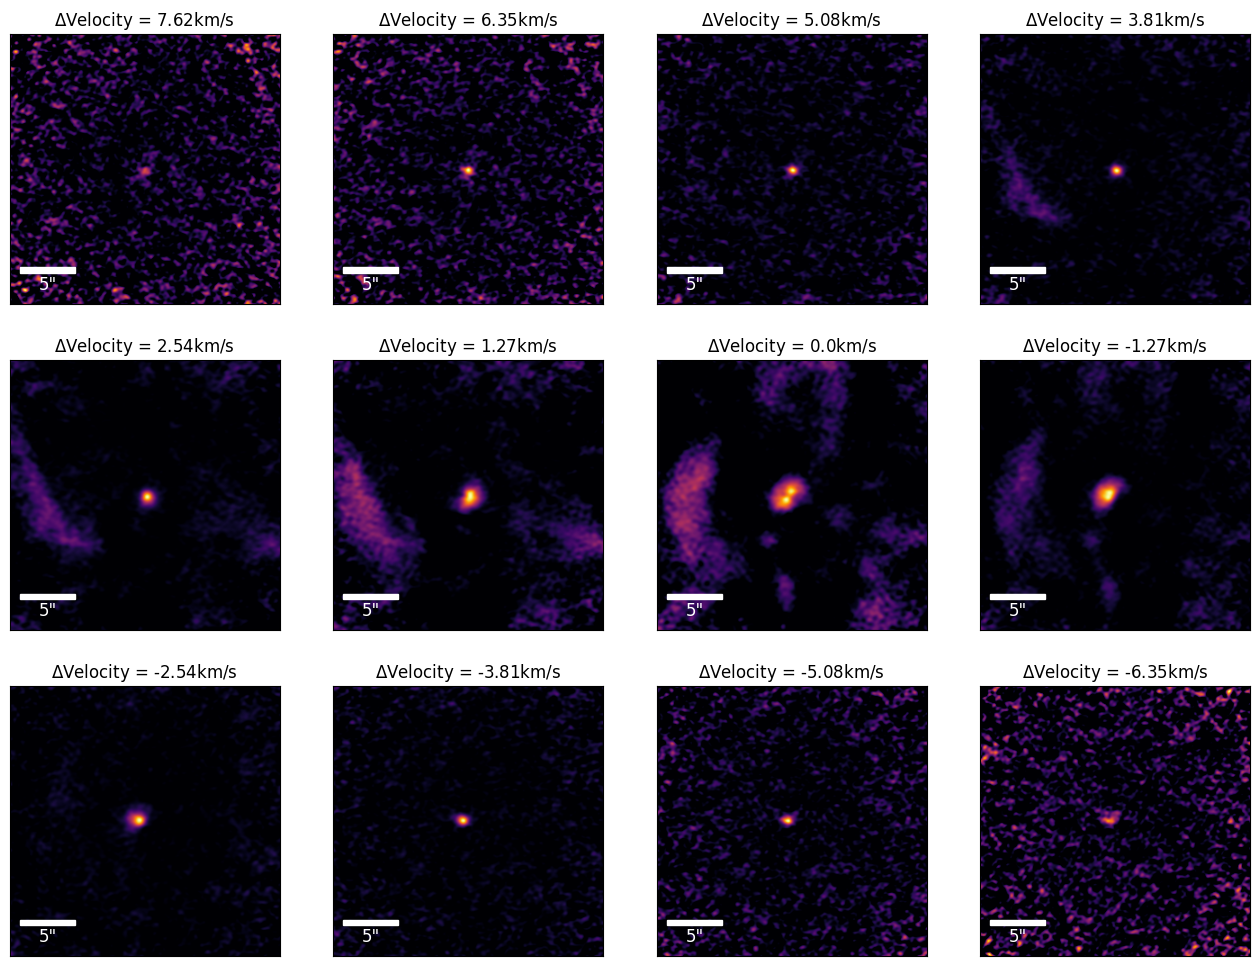

In [77]:
sub_cube_slab = cube.spectral_slab(2.3053e+11 *u.Hz, 2.30536e+11 *u.Hz)

subcubearray = np.array(sub_cube_slab)
#print(subcubearray[0])
m=1
fig, ax = plt.subplots(3,4,figsize=(16*m,12*m),squeeze=True)
imgsize=300
fontprops = fm.FontProperties(size=12)
#fig.supxlabel('$\Delta$RA (arcsec)')
#fig.supylabel('$\Delta$Dec (arcsec)')

for image in range(0,4):
    
    ax[0,image].tick_params(
        axis='both',          # changes apply to both axes
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False, 
        left=False,
        right=False,
        labelbottom=False,
        labelleft=False)
    ax[0,image].imshow(Cutout2D(subcubearray[image+1],(256.5,256.5),(imgsize,imgsize)).data,
                       cmap='inferno',origin='lower',vmin=0,extent=[-0.08172*imgsize/2,0.08172*imgsize/2,
                                                                    -0.08172*imgsize/2,0.08172*imgsize/2])
    ax[0,image].set_title('$\Delta$Velocity = {}km/s'.format((7-(image+1))*(1.27)))
    scalebar = AnchoredSizeBar(ax[0,image].transData,
                           5, '5"', 'lower left', 
                           pad=0.5,
                           color='white',
                           frameon=False,
                           size_vertical=0.5,
                           fontproperties=fontprops
                           )
    ax[0,image].add_artist(scalebar)


for image in range(0,4):
    ax[1,image].tick_params(
        axis='both',          # changes apply to both axes
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False, 
        left=False,
        right=False,
        labelbottom=False,
        labelleft=False)
    ax[1,image].imshow(Cutout2D(subcubearray[image+5],(256.5,256.5),(imgsize,imgsize)).data,
                       cmap='inferno',origin='lower',vmin=0,extent=[-0.08172*imgsize/2,0.08172*imgsize/2,
                                                                    -0.08172*imgsize/2,0.08172*imgsize/2])
    ax[1,image].set_title('$\Delta$Velocity = {}km/s'.format((7-(image+5))*(1.27)))
    scalebar = AnchoredSizeBar(ax[1,image].transData,
                           5, '5"', 'lower left', 
                           pad=0.5,
                           color='white',
                           frameon=False,
                           size_vertical=0.5,
                           fontproperties=fontprops
                           )
    ax[1,image].add_artist(scalebar)

for image in range(0,4):
    ax[2,image].tick_params(
        axis='both',          # changes apply to both axes
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False, 
        left=False,
        right=False,
        labelbottom=False,
        labelleft=False)
    ax[2,image].imshow(Cutout2D(subcubearray[image+9],(256.5,256.5),(imgsize,imgsize)).data,
                       cmap='inferno',origin='lower',vmin=0,extent=[-0.08172*imgsize/2,0.08172*imgsize/2,
                                                                    -0.08172*imgsize/2,0.08172*imgsize/2])
    ax[2,image].set_title('$\Delta$Velocity = {}km/s'.format((7-(image+9))*(1.27)))
    scalebar = AnchoredSizeBar(ax[2,image].transData,
                           5, '5"', 'lower left', 
                           pad=0.5,
                           color='white',
                           frameon=False,
                           size_vertical=0.5,
                           fontproperties=fontprops
                           )
    ax[2,image].add_artist(scalebar)


plt.savefig('ALMASlices.pdf',bbox_inches='tight')

In [7]:
#sub_cube_slab.write('fits/ATPyxSubCube.fits', format='fits',overwrite=True)  

In [94]:
data, velax = bm.load_cube('fits/ATPyxSubCube.fits')

smoothed_data = bm.smooth_data(data=data,smooth=1,polyorder=0)
rms = bm.estimate_RMS(data=data, N=1)
rms_smoothed = bm.estimate_RMS(data=smoothed_data, N=1)

print('RMS = {:.1f} mJy/beam (original)'.format(rms * 1e3))
print('RMS = {:.1f} mJy/beam (smoothed)'.format(rms_smoothed * 1e3))

RMS = 6.8 mJy/beam (original)
RMS = 6.8 mJy/beam (smoothed)


In [137]:
user_mask = bm.get_user_mask(data=data, user_mask_path=None)

threshold_mask=bm.get_threshold_mask(data=data,
                                    clip=2.5,
                                    smooth_threshold_mask=0.0)

channel_mask = bm.get_channel_mask(data=data,
                                   firstchannel=2,
                                   lastchannel=-3)

mask = bm.get_combined_mask(user_mask=user_mask,
                            threshold_mask=threshold_mask,
                            channel_mask=channel_mask,
                            combine='and')
masked_data = smoothed_data * mask

bm.available_collapse_methods()

Available methods are:

	 zeroth       (integrated intensity)
	 first        (intensity weighted average velocity)
	 second       (intensity weighted velocity dispersion)
	 eighth       (peak intensity)
	 ninth        (velocity channel of peak intensity)
	 maximum      (both collapse_eighth and collapse_ninth)
	 quadratic    (quadratic fit to peak intensity)
	 width        (effective width for a Gaussian profile)
	 percentiles  (intesity weighted percentiles)
	 gaussian     (gaussian fit)
	 gaussthick   (gaussian with optically thick core fit)
	 gausshermite (gaussian-hermite expansion fit)
	 doublegauss  (double gaussian fit)

Call the function with `collapse_{method_name}`.


In [138]:
moments = bm.collapse_first(velax=velax, data=masked_data, rms=rms)

In [139]:
bm.save_to_FITS(moments=moments, method='first', path='fits/ATPyxSubCube.fits')

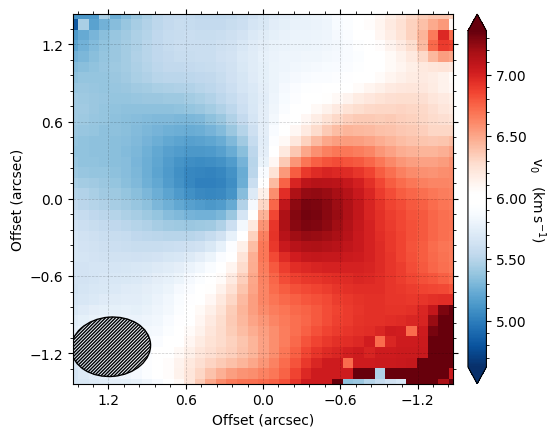

In [13]:
cube = rotationmap(path='fits/ATPyxSubCubeSmall_gv0.fits',
                   uncertainty='fits/ATPyxSubCubeSmall_dgv0.fits',
                   #downsample='beam',
                   FOV=2.8)
cube.plot_data()

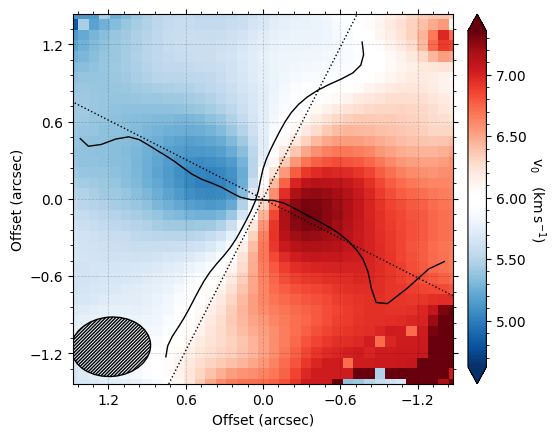

In [18]:
cube.plot_maxima(inc=38.5,PA=243, r_max=4.0, smooth=0.3)

Assuming:
	p0 = [x0, y0, PA, mstar, vlsr, z0, psi].


100%|███████████████████████████████████████| 2500/2500 [00:36<00:00, 67.61it/s]


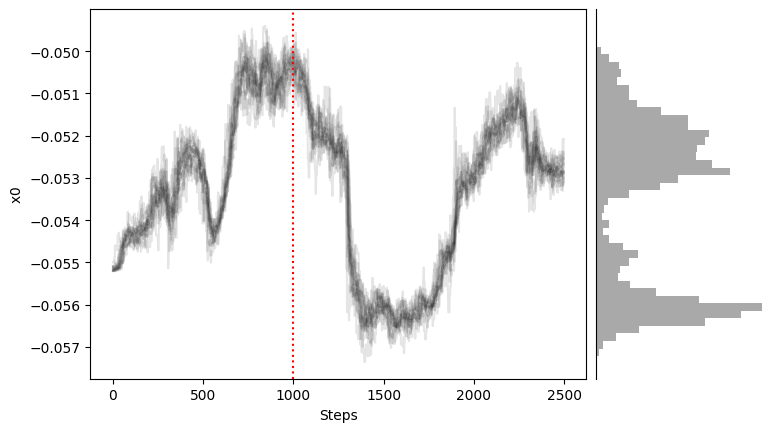

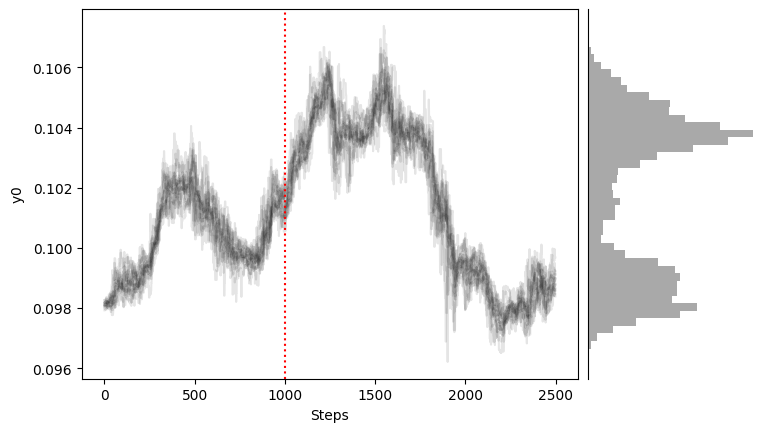

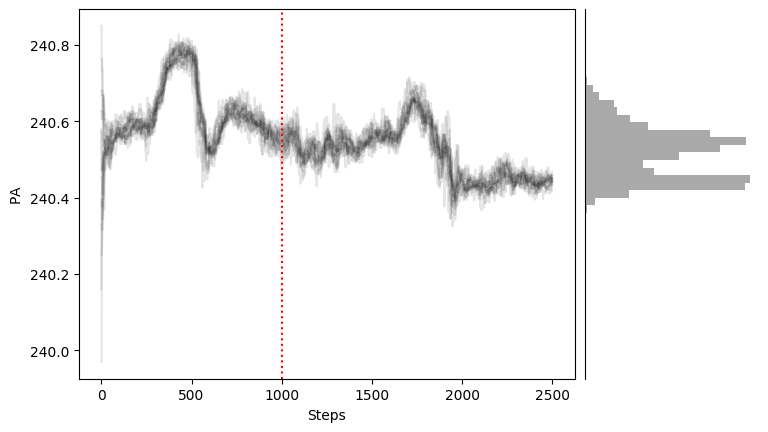

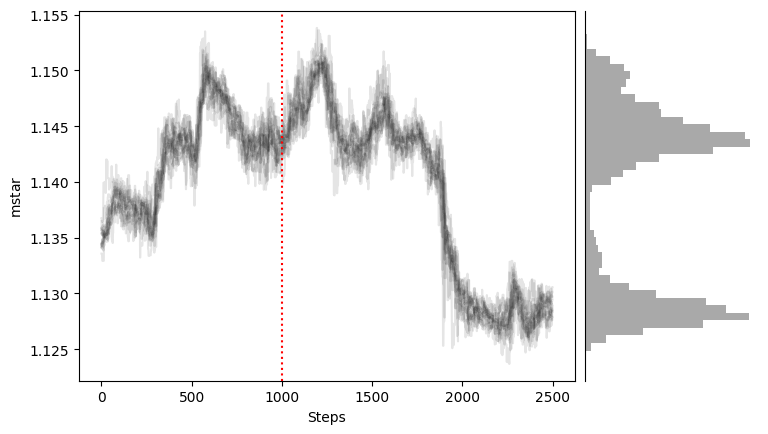

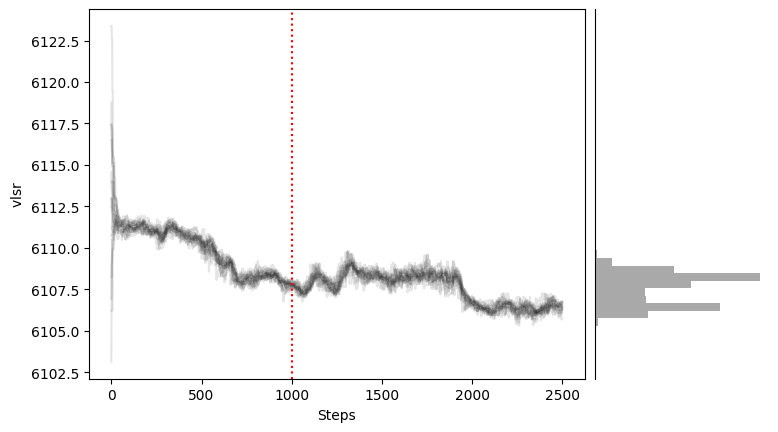

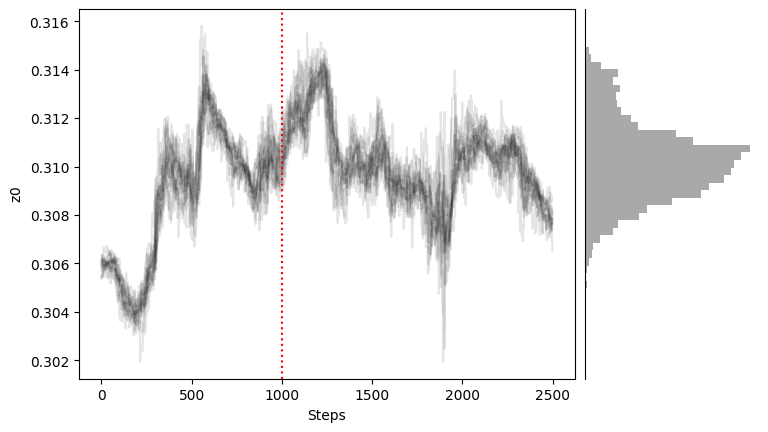

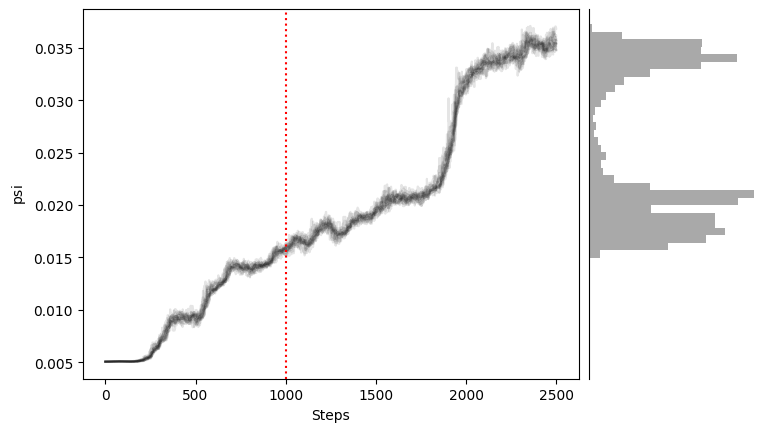

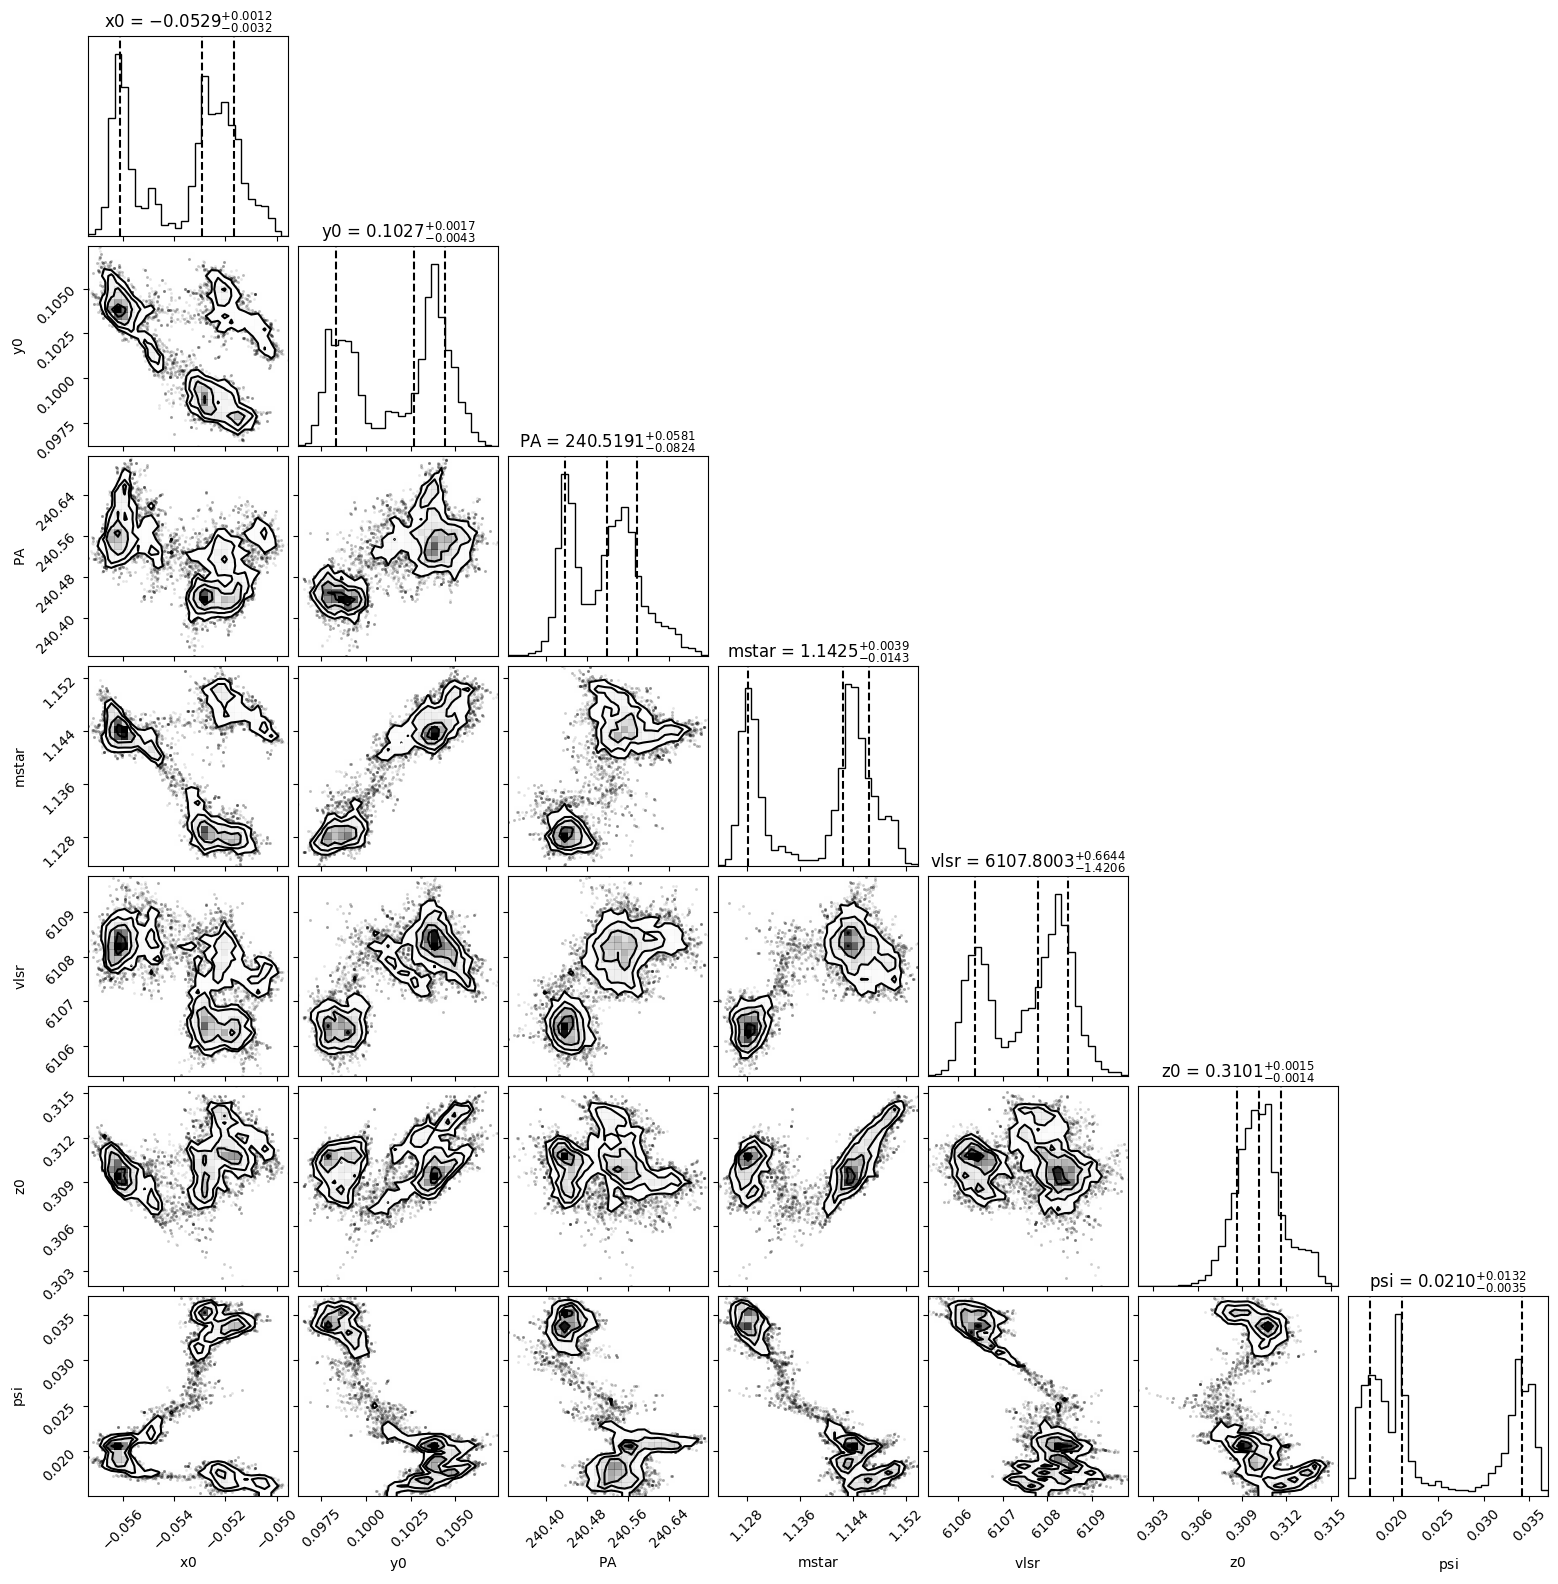

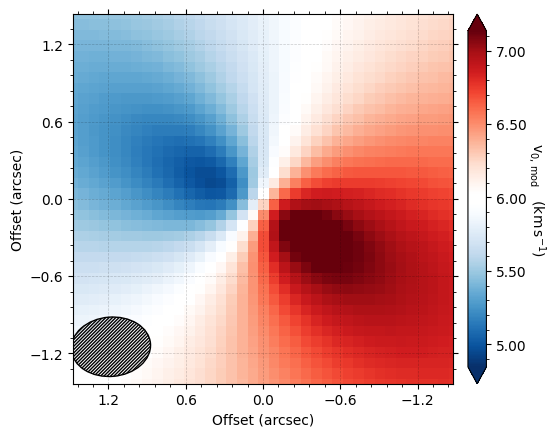

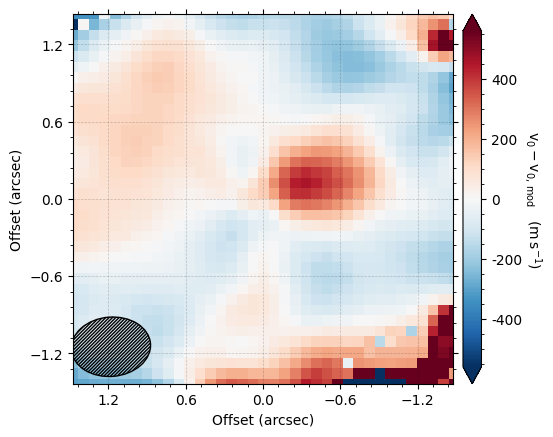

In [59]:
params = {}
params['x0'] = 0
params['y0'] = 1
params['PA'] = 2
params['mstar'] = 3
params['vlsr'] = 4

p0 = [-0.14, 0.0863, 241., 1.23, 6.1e3]

params['inc'] = 38.5
params['dist'] = 370.0

# Include elevated emission surface parameters.

params['z0'] = 5
params['psi'] = 6


#params['v_max'] = 8.0
#params['v_min'] = 4.0

p0 += [0.446, 1.2]


samples = cube.fit_map(p0=p0, params=params, optimize=False,
                           nwalkers=16, nburnin=1000, nsteps=1500,niter=5
                           )

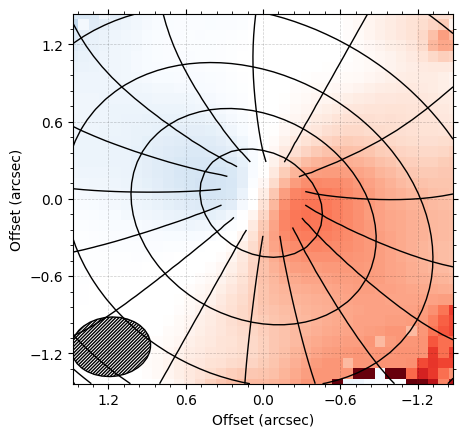

In [16]:
imshow_kwargs = dict(vmin=2.77, vmax=8.77, cmap=cube.cmap())
plot_surface_kwargs = dict(fill='self.data / 1e3',
                           imshow_kwargs=imshow_kwargs)

fig = cube.plot_model_surface(samples, params, plot_surface_kwargs=plot_surface_kwargs)

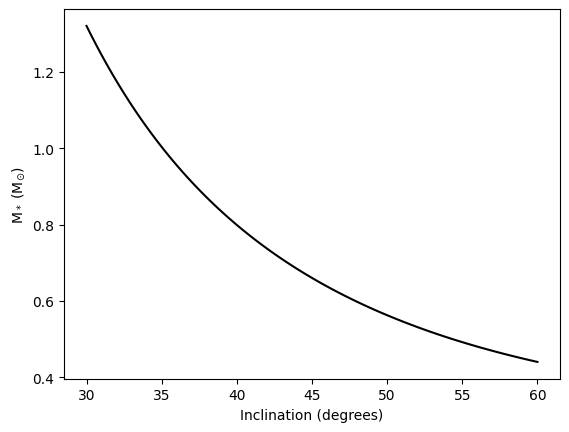

In [80]:
def mtoincrelation(i):
    M = (((8.127e14)/(np.sin(i*np.pi/180)))**2)/2e30
    return M

def massdependency(i,dv,z0,r=5.535e13,phi=0,psi=1.2):
    z = z0*(r/5.535e13)**psi
    M = (((dv/np.cos(phi)) * np.sqrt(((r** + z**2)**1.5)/(6.7e-11*r**2)))/np.sin(i))**2
    return M/2e30

inc = np.linspace(30,60,100)

M = []
for m in range(len(inc)):
    
    M.append(mtoincrelation(i=inc[m]))
             #              dv=400,
            #               z0=0.4)/2e30
            



plt.plot(inc,M,color='black')
plt.xlabel('Inclination (degrees)')
plt.ylabel('M$_*$ (M$_{\odot}$)')
plt.savefig('InclinationMassSensitivity.pdf',bbox_inches='tight')

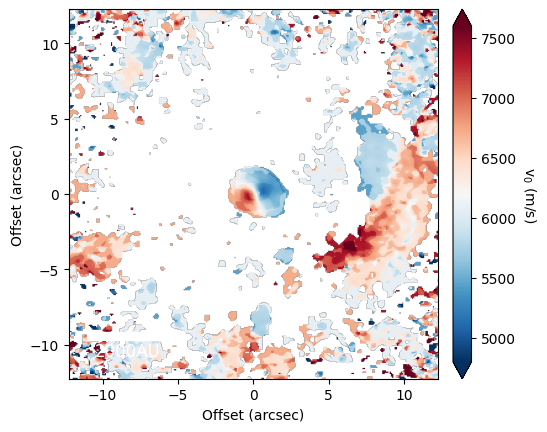

In [35]:
momentone = fits.open('fits/ATPyxSubCube_M1.fits')[0].data
momentone = np.array(Cutout2D(momentone,
                                (len(momentone[0])/2,len(momentone)/2),
                                (300,300)).data)
fig,ax = plt.subplots(1,1) 


im = ax.imshow(momentone,
          cmap='RdBu_r',
          extent=[0.08172*150,-0.08172*150,-0.08172*150,0.08172*150],origin='lower',
               vmin=4800,vmax=7600,
               zorder=-9)
cb = plt.colorbar(im, pad=0.03, extend='both', format='%.0f')
cb.set_label(r'v$_0$ (m/s)',
                     rotation=270, labelpad=15)

scalebar = AnchoredSizeBar(ax.transData,
                           5.405, '2000AU', 'lower left', 
                           pad=1,
                           color='white',
                           frameon=False,
                           size_vertical=0.5,
                           fontproperties=fontprops
                           )
ax.add_artist(scalebar)
ax.invert_xaxis()

ax.set_xlabel('Offset (arcsec)')
ax.set_ylabel('Offset (arcsec)')
plt.savefig('EnvironMoment1.pdf',bbox_inches='tight')

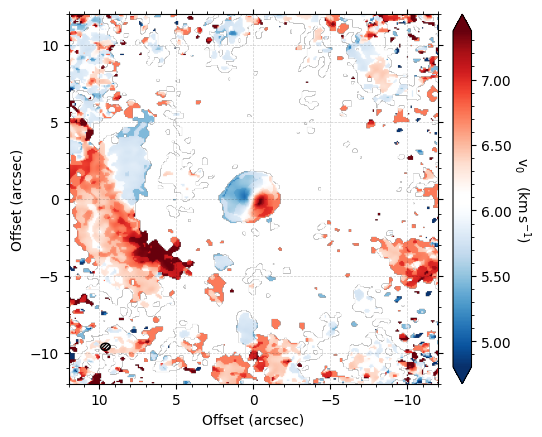

In [9]:
environcube = rotationmap(path='fits/ATPyxSubCube_M1.fits',
                   uncertainty='fits/ATPyxSubCube_dM1.fits',
                   #downsample='beam',
                   FOV=24)
environcube.plot_data()
plt.savefig('EnvironMoment1.pdf',bbox_inches='tight')

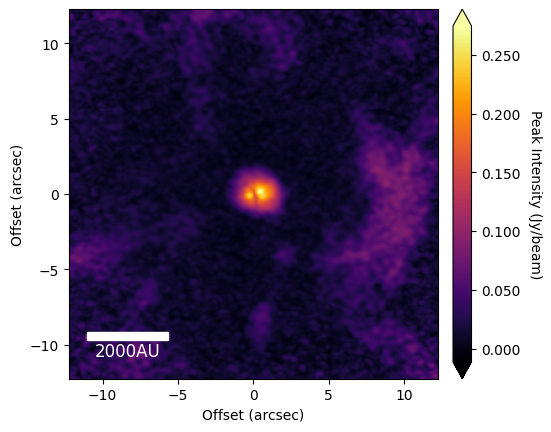

In [27]:
import matplotlib.font_manager as fm
fontprops = fm.FontProperties(size=12)

momenteight = fits.open('fits/ATPyxSubCube_M8.fits')[0].data
momenteight = np.array(Cutout2D(momenteight,
                                (len(momenteight[0])/2,len(momenteight)/2),
                                (300,300)).data)
fig,ax = plt.subplots(1,1) 


im = ax.imshow(momenteight,
          cmap='inferno',
          extent=[0.08172*150,-0.08172*150,-0.08172*150,0.08172*150],origin='lower',zorder=-9)
cb = plt.colorbar(im, pad=0.03, extend='both', format='%.3f')
cb.set_label(r'Peak Intensity (Jy/beam)',
                     rotation=270, labelpad=15)

scalebar = AnchoredSizeBar(ax.transData,
                           5.405, '2000AU', 'lower left', 
                           pad=1,
                           color='white',
                           frameon=False,
                           size_vertical=0.5,
                           fontproperties=fontprops
                           )
ax.add_artist(scalebar)
ax.invert_xaxis()

ax.set_xlabel('Offset (arcsec)')
ax.set_ylabel('Offset (arcsec)')
plt.savefig('EnvironMoment8.pdf',bbox_inches='tight')

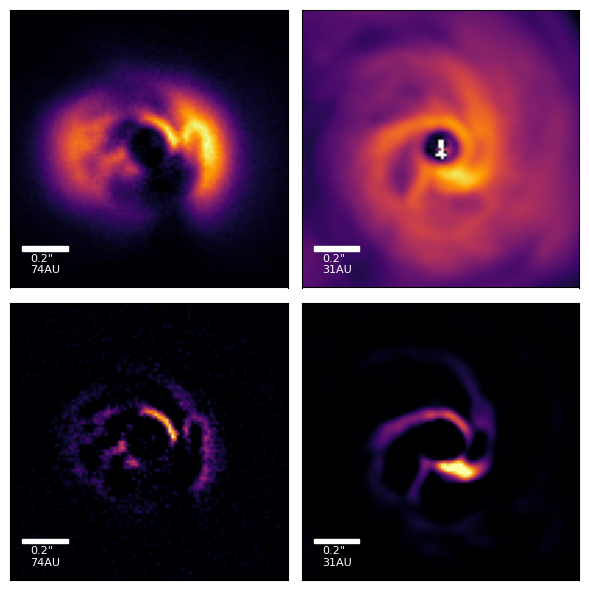

In [100]:
from scipy import ndimage
from matplotlib.colors import LogNorm

fontprops = fm.FontProperties(size=8)

ATPyx = fits.open('fits/AT_Pyx_2024-01-17_Q_phi.fits')[0].data
ATPyx = np.array(Cutout2D(ATPyx,
                                (len(ATPyx[0])/2,len(ATPyx)/2),
                                (100,100)).data)

ABAur = fits.open('fits/AB_Aur_SPHERE_2019-12-18_H.fits')[0].data[1]
ABAur = np.array((Cutout2D(ndimage.rotate(ABAur,60),
                                (len(ndimage.rotate(ABAur,60)[0])/2,len(ndimage.rotate(ABAur,60))/2),
                                (100,100)).data))


fig, ax = plt.subplots(2,2,figsize=(6,6))
ax[0,0].imshow(ATPyx,origin='lower',vmin=0,cmap='inferno',extent=[-0.012251*len(ATPyx[0])/2,
                                                               0.012251*len(ATPyx[0])/2,
                                                               -0.012251*len(ATPyx[0])/2,
                                                               0.012251*len(ATPyx[0])/2])

scalebar = AnchoredSizeBar(ax[0,0].transData,
                           0.2, '0.2"\n74AU', 'lower left', 
                           pad=1,
                           color='white',
                           frameon=False,
                           size_vertical=0.02,
                           fontproperties=fontprops
                           )
ax[0,0].add_artist(scalebar)
ax[0,1].imshow(ABAur,origin='lower',norm=LogNorm(vmin=0.01,vmax=1),
             extent=[-0.012251*len(ABAur[0])/2,
                    0.012251*len(ABAur[0])/2,
                    -0.012251*len(ABAur[0])/2,
                    0.012251*len(ABAur[0])/2],
             cmap='inferno')
ax[0,1].invert_xaxis()

scalebar = AnchoredSizeBar(ax[0,1].transData,
                           0.2, '0.2"\n31AU', 'lower left', 
                           pad=1,
                           color='white',
                           frameon=False,
                           size_vertical=0.02,
                           fontproperties=fontprops
                           )
ax[0,1].add_artist(scalebar)


ATPyxgauss = ndimage.gaussian_filter(ATPyx,2)
ATPyxhipass = ATPyx - ATPyxgauss

ABAurgauss = ndimage.gaussian_filter(ABAur,6)
ABAurhipass = ABAur - ABAurgauss



ax[1,0].imshow(ATPyxhipass,origin='lower',vmin=0,cmap='inferno',extent=[-0.012251*len(ATPyx[0])/2,
                                                               0.012251*len(ATPyx[0])/2,
                                                               -0.012251*len(ATPyx[0])/2,
                                                               0.012251*len(ATPyx[0])/2])
scalebar = AnchoredSizeBar(ax[1,0].transData,
                           0.2, '0.2"\n74AU', 'lower left', 
                           pad=1,
                           color='white',
                           frameon=False,
                           size_vertical=0.02,
                           fontproperties=fontprops
                           )
ax[1,0].add_artist(scalebar)
ax[1,1].imshow(ABAurhipass,origin='lower',#norm=LogNorm(vmin=0.01,vmax=1),
               vmin=0,vmax=0.3,
             extent=[-0.012251*len(ABAur[0])/2,
                    0.012251*len(ABAur[0])/2,
                    -0.012251*len(ABAur[0])/2,
                    0.012251*len(ABAur[0])/2],
             cmap='inferno')
ax[1,1].invert_xaxis()
scalebar = AnchoredSizeBar(ax[1,1].transData,
                           0.2, '0.2"\n31AU', 'lower left', 
                           pad=1,
                           color='white',
                           frameon=False,
                           size_vertical=0.02,
                           fontproperties=fontprops
                           )
ax[1,1].add_artist(scalebar)

for plot in range(2):
        ax[0,plot].tick_params(
        axis='both',          # changes apply to both axes
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False, 
        left=False,
        right=False,
        labelbottom=False,
        labelleft=False)
for plot in range(2):
        ax[1,plot].tick_params(
        axis='both',          # changes apply to both axes
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False, 
        left=False,
        right=False,
        labelbottom=False,
        labelleft=False)

#156AU/as
fig.tight_layout()
plt.savefig('ABAurComparison.pdf',bbox_inches='tight')

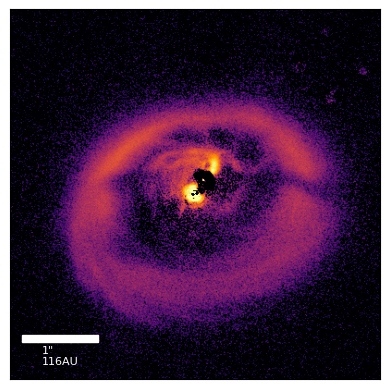

In [143]:
GGTau = fits.open('fits/GGTauA_SPHERE_2016-11-19_H.fits')[0].data[1]
GGTau = np.array(Cutout2D(GGTau,
                                (len(GGTau[0])/2,len(GGTau)/2),
                                (400,400)).data)

fontprops = fm.FontProperties(size=8)
fig,ax = plt.subplots(1,1)
ax.imshow(GGTau,origin='lower',cmap='inferno',norm=LogNorm(clip=True,vmax=0.01,vmin=0.0001),
         extent=[-0.012251*len(GGTau[0])/2,
                    0.012251*len(GGTau[0])/2,
                    -0.012251*len(GGTau[0])/2,
                    0.012251*len(GGTau[0])/2])
ax.tick_params(
        axis='both',          # changes apply to both axes
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False, 
        left=False,
        right=False,
        labelbottom=False,
        labelleft=False)
scalebar = AnchoredSizeBar(ax.transData,
                           1, '1"\n116AU', 'lower left', 
                           pad=1,
                           color='white',
                           frameon=False,
                           size_vertical=0.1,
                           fontproperties=fontprops
                           )
ax.add_artist(scalebar)
plt.savefig('GGTau.pdf',bbox_inches='tight')

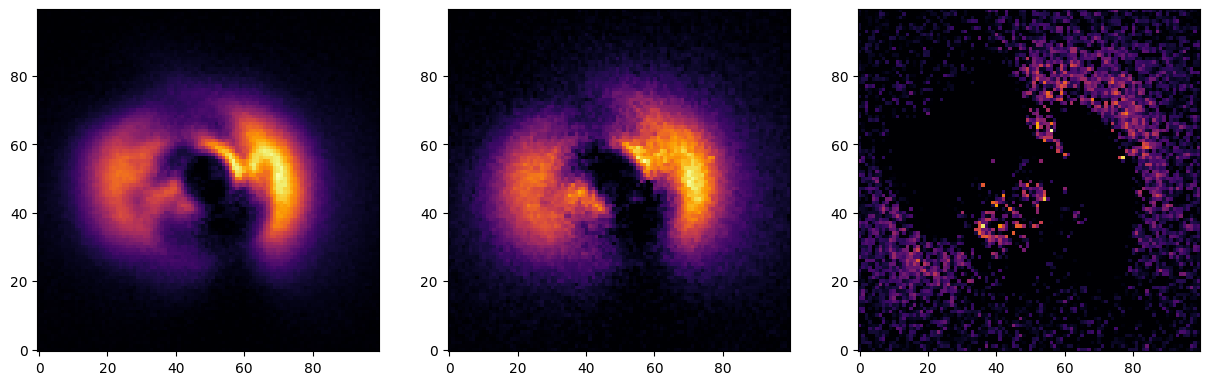

In [162]:
ATPyxOld = fits.open('fits/IRAS_08267-3336_2017-05-15_Q_phi.fits')[0].data
ATPyxOld = np.array(Cutout2D(ATPyxOld,
                                (len(ATPyxOld[0])/2,len(ATPyxOld)/2),
                                (100,100)).data)
ATPyxSub = ATPyxOld - ATPyx
ATPyxSub1 = ATPyx - ATPyxOld

fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(ATPyx,cmap='inferno',origin='lower',vmin=0)
ax[1].imshow(ATPyxOld,cmap='inferno',origin='lower',vmin=0)
ax[2].imshow(ATPyxSub,cmap='inferno',origin='lower',vmin=0)



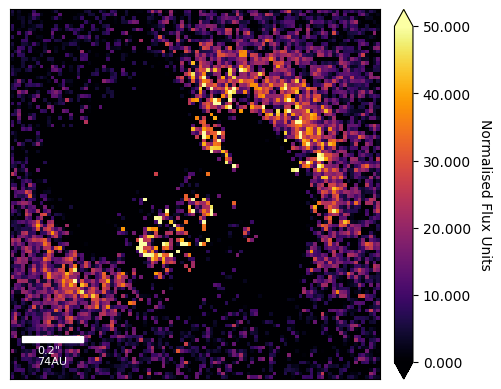

In [178]:
fig,ax = plt.subplots(1,1)

im = ax.imshow(ATPyxSub,origin='lower',cmap='inferno',vmin=0,vmax=50,
         extent=[-0.012251*len(ATPyxSub[0])/2,
                    0.012251*len(ATPyxSub[0])/2,
                    -0.012251*len(ATPyxSub[0])/2,
                    0.012251*len(ATPyxSub[0])/2])


ax.tick_params(
        axis='both',          # changes apply to both axes
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False, 
        left=False,
        right=False,
        labelbottom=False,
        labelleft=False)
scalebar = AnchoredSizeBar(ax.transData,
                           0.2, '0.2"\n74AU', 'lower left', 
                           pad=1,
                           color='white',
                           frameon=False,
                           size_vertical=0.02,
                           fontproperties=fontprops
                           )
cb = plt.colorbar(im, pad=0.03, extend='both', format='%.3f')
cb.set_label(r'Normalised Flux Units',
                     rotation=270, labelpad=15)

ax.add_artist(scalebar)
plt.savefig('ATPyxSub.pdf',bbox_inches='tight')

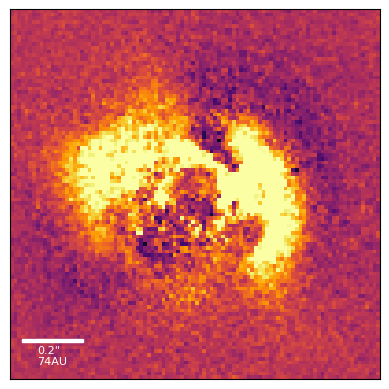

In [171]:
fig,ax = plt.subplots(1,1)

ax.imshow(ATPyxSub1,origin='lower',cmap='inferno',vmin=-100,vmax=100,
         extent=[-0.012251*len(ATPyxSub1[0])/2,
                    0.012251*len(ATPyxSub1[0])/2,
                    -0.012251*len(ATPyxSub1[0])/2,
                    0.012251*len(ATPyxSub1[0])/2])
ax.tick_params(
        axis='both',          # changes apply to both axes
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False, 
        left=False,
        right=False,
        labelbottom=False,
        labelleft=False)
scalebar = AnchoredSizeBar(ax.transData,
                           0.2, '0.2"\n74AU', 'lower left', 
                           pad=1,
                           color='white',
                           frameon=False,
                           size_vertical=0.01,
                           fontproperties=fontprops
                           )
ax.add_artist(scalebar)
plt.savefig('ATPyxSub1.pdf',bbox_inches='tight')